Aperçu du dataset avec la charge thermique et la puissance de climatisation :
   debit d'air  temperature intern  nomber de pasagere  temperature conssigne  \
0       359.31               28.44                   5                  24.05   
1       311.83               28.93                   2                  21.52   
2       228.70               29.40                   3                  22.83   
3       417.91                6.68                   3                  24.30   
4       485.57               24.92                   4                  20.23   

   intensite solaire  puisance d'equipement  mass d'air  vitesse de voiture  \
0             183.81                1824.76        1.02               68.96   
1             210.96                1338.98        2.29               64.73   
2             242.98                1548.97        4.52                8.92   
3             323.43                 686.88        4.58              159.71   
4             344.03                1204

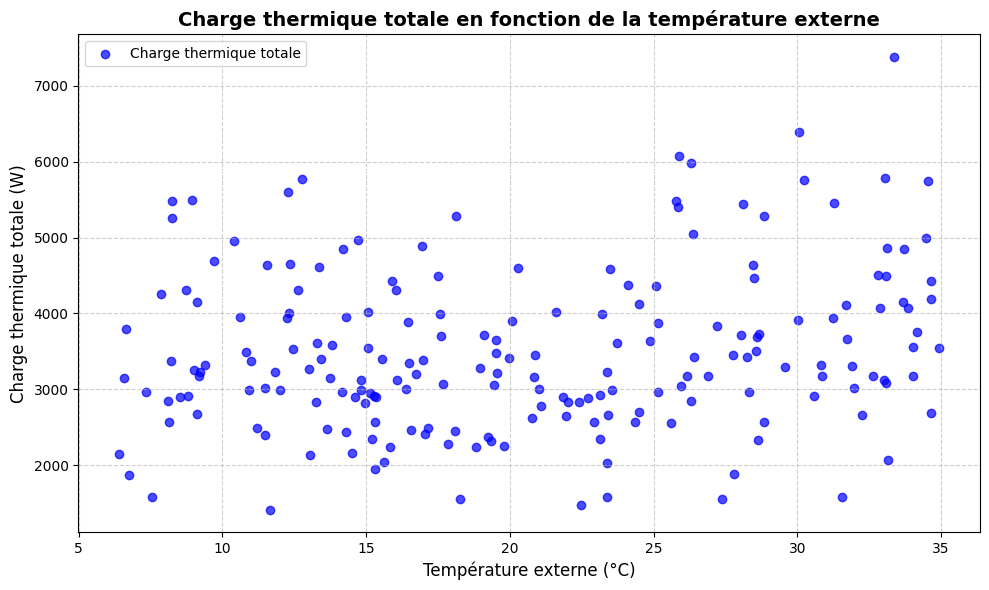

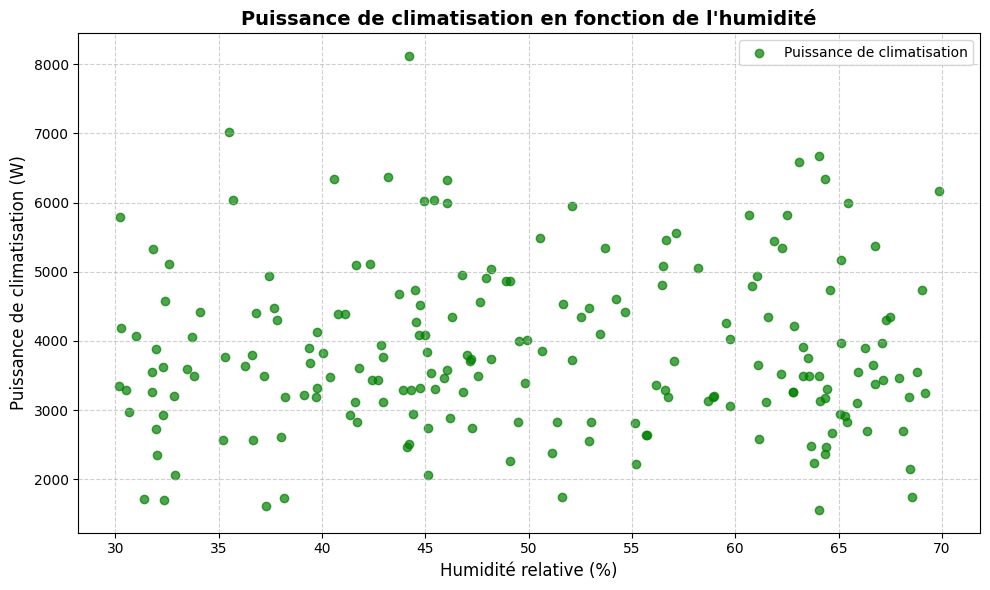

In [ ]:
# Importer les bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Données fournies
GHI = 1979  # Global Horizontal Irradiance en kWh/m²
GTI = 2231  # Global Tilted Irradiance en kWh/m²

# Conversion de GTI en W/m² (intensité solaire)
intensite_solaire_gti = (GTI * 1000) / 8760  # Conversion de kWh/m² à W/m²

# Créer un dataset pour simuler la consommation d'énergie d'une Toyota C-HR
num_rows = 200  # Nombre de lignes dans le dataset

# Générer des données aléatoires pour chaque colonne
data = {
    'debit d\'air': np.round(np.random.uniform(200, 600, num_rows), 2),  # Débit d'air en m³/h
    'temperature intern': np.round(np.random.uniform(6, 35, num_rows), 2),  # Température interne en °C
    'nomber de pasagere': np.random.randint(1, 6, num_rows),  # Nombre de passagers (1 à 5)
    'temperature conssigne': np.round(np.random.uniform(18, 25, num_rows), 2),  # Température de consigne en °C
    'intensite solaire': np.round(np.random.normal(intensite_solaire_gti, 50, num_rows), 2),  # Intensité solaire en W/m²
    'puisance d\'equipement': np.round(np.random.uniform(500, 2000, num_rows), 2),  # Puissance des équipements en W
    'mass d\'air': np.round(np.random.uniform(1, 5, num_rows), 2),  # Masse d'air en kg
    'vitesse de voiture': np.round(np.random.uniform(0, 180, num_rows), 2),  # Vitesse de la voiture en km/h
    'temperature externe': np.round(np.random.uniform(6, 35, num_rows), 2)  # Température externe en °C (plage ajustée)
}

# Convertir les données en DataFrame
df = pd.DataFrame(data)

# Ajouter une colonne pour l'humidité relative (en %)
df['humidite'] = np.round(np.random.uniform(30, 70, num_rows), 2)  # Humidité entre 30% et 90%

# Ajouter une colonne pour la différence de température
df['difference_temperature'] = abs(df['temperature intern'] - df['temperature externe']).round(2)

# Constantes pour les calculs
efficacite_climatisation = 0.8  # Efficacité du système de climatisation (80%)
facteur_utilisation = 0.9  # Facteur d'utilisation des équipements (90%)
coefficient_aerodynamique = 0.3  # Coefficient aérodynamique de la voiture
facteur_absorption = 0.7  # Facteur d'absorption de l'énergie solaire
capacite_thermique_air = 1.006  # Capacité thermique de l'air en kJ/kg·K

# Paramètres pour le calcul de la charge thermique
surface_vitree = 5  # Surface vitrée en m²
facteur_solaire = 0.6  # Facteur solaire du verre
surface_parois = 10  # Surface des parois exposées en m²
coefficient_transmission = 2.5  # Coefficient de transmission thermique en W/m²·K
chaleur_passager = 100  # Chaleur produite par passager en W
capacite_thermique_massique_air = 1005  # Capacité thermique massique de l'air en J/kg·K

# Calculer la charge thermique totale et la puissance de climatisation
df['Qsolaire'] = surface_vitree * facteur_solaire * df['intensite solaire']
df['Qparois'] = surface_parois * coefficient_transmission * df['difference_temperature']
df['Qinterne'] = df['nomber de pasagere'] * chaleur_passager + df['puisance d\'equipement']
df['Qair'] = (df['debit d\'air'] / 3600) * capacite_thermique_massique_air * df['difference_temperature']  # Conversion de m³/h à kg/s
df['Qtotale'] = df['Qsolaire'] + df['Qparois'] + df['Qinterne'] + df['Qair']
df['puissance_climatisation'] = df['Qtotale'] * 1.10  # Ajouter 10% de marge

# Sauvegarder le dataset dans un fichier CSV
df.to_csv('toyota_chr_energy_consumption.csv', index=False)

# Afficher les premières lignes du dataset
print("Aperçu du dataset avec la charge thermique et la puissance de climatisation :")
print(df.head())

# Visualisation des données avec matplotlib

# 1. Charge thermique totale en fonction de la température externe
plt.figure(figsize=(10, 6))
plt.scatter(df['temperature externe'], df['Qtotale'], color='blue', alpha=0.7, label='Charge thermique totale')
plt.title('Charge thermique totale en fonction de la température externe', fontsize=14, fontweight='bold')
plt.xlabel('Température externe (°C)', fontsize=12)
plt.ylabel('Charge thermique totale (W)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# 2. Puissance de climatisation en fonction de l'humidité
plt.figure(figsize=(10, 6))
plt.scatter(df['humidite'], df['puissance_climatisation'], color='green', alpha=0.7, label='Puissance de climatisation')
plt.title('Puissance de climatisation en fonction de l\'humidité', fontsize=14, fontweight='bold')
plt.xlabel('Humidité relative (%)', fontsize=12)
plt.ylabel('Puissance de climatisation (W)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()